- __비정형 데이터__ : 정해진 형태가 없고 연산이 불가능한 상태의 데이터를 의미한다. 이미지 데이터나 음성 데이터를 예로 들 수 있으며, 가장 대표적인 것은 텍스트 데이터이다.  
- __텍스트 마이닝__ : 비정형 데이터인 텍스트 데이터로부터 유의미한 정보를 추출하는 데이터 분석
- __웹 크롤링(웹 스크래핑)__ : 인터넷에 있는 웹 페이지를 방문해서 페이지의 자료를 자동으로 수집하는 작업을 의미

# 2.1 웹 크롤링으로 기초 데이터 수집하기

- '나무위키 최근 변경 페이지'의 텍스트 데이터를 웹 크롤링으로 수집한 다음, 데이터 내에서 등장한 키위드의 출현 빈도를 분석(https://namu.wiki/RecentChanges)  
    => 나무위키 페이지에서 현재 가장 '핫한' 키워드가 무엇인지 분석할 수 있다. 
- 파이썬 에서는 requests과 BeautifulSoup이라는 라이브러리로 웹 크롤러를 만들 수 있다. 
- requests : 특정 url로부터 html 문서를 가져오는 작업을 수행
- BeautifulSoup : html 문서에서 데이터를 추출하는 작업을 수행

### _최근 변경 페이지 url들 수집해서 리스트에 넣기_

In [1]:
import requests
from bs4 import BeautifulSoup
import re

# 크롤링할 사이트 주소
source_url = 'https://namu.wiki/RecentChanges'

# 사이트의 html 구조에 기반해 크롤링 수행
req = requests.get(source_url) # url의 html 문서를 가져오기 # <Response [200]>
html = req.content
soup = BeautifulSoup(html, 'lxml') # BeautifulSoup() 클래스의 soup 객체로 변환
contents_table = soup.find(name='table')
table_body = contents_table.find(name='tbody')
table_rows = table_body.find_all(name='tr')

# a 태그의 href 속성을 리스트로 추출하여 크롤링할 페이지 리스트 생성
page_url_base = 'https://namu.wiki'
page_urls = []
for index in range(len(table_rows)):
    first_td = table_rows[index].find_all('td')[0] # table의 row 1줄 가져오기 
    td_url = first_td.find_all('a') # a 태그들만 가져오기
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href') # '항목'의 url 가져오기 # get() 함수로 속성 정보 추출
        page_urls.append(page_url)
        
# 중복 url 제거
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/%EB%8F%88%20%EC%84%9C%ED%8A%BC
https://namu.wiki/w/%ED%8B%80:NiziU
https://namu.wiki/w/%EC%97%AC%EC%97%90%EC%8A%A4%EB%8D%94
https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EC%97%90%EC%9D%B4%EB%A6%AC%EA%B7%B8%20%ED%8C%A8%EC%B9%98.png
https://namu.wiki/w/%EC%9B%90%EC%9C%84


###  _수집한 url에 방문하여 텍스트 정보 수집_

- 제목 : #app > div > div:nth-child(2) > __article__ > __h1__ > a
- 카테고리 : #app > div > div:nth-child(2) > __article__ > div:nth-child(5) > div:nth-child(1) > __ul__ > li:nth-child(1) > a
- 본문 : #app > div > div:nth-child(2) > __article__ > div:nth-child(5) > div:nth-child(2) > div > div

In [2]:
req = requests.get(page_urls[0]) # url의 html 문서를 가져오기 # <Response [200]>
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="article")
title = contents_table.find_all(name='h1')[0]
category = contents_table.find_all(name='ul')[0]
content_paragraphs = contents_table.find_all(name='div', attrs={'class':'wiki-paragraph'})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text) # text 정보만 추출
    
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

돈 서튼 


미국의 야구 선수1945년 출생앨라배마 주 출신 인물투수우완 투수우투우타로스앤젤레스 다저스/은퇴, 이적휴스턴 애스트로스/은퇴, 이적밀워키 브루어스/은퇴, 이적오클랜드 애슬레틱스/은퇴, 이적로스앤젤레스 에인절스/은퇴, 이적2021년 사망


야구 관련 인물(MLB)돈 서튼의 수상 경력 [ 펼치기 · 접기 ]로스앤젤레스 다저스의 영구결번  [ 펼치기 · 접기 ]피 위 리즈토미 라소다듀크 스나이더짐 길리엄돈 서튼월터 앨스턴샌디 코팩스로이 캄파넬라재키 로빈슨돈 드라이스데일빈 스컬리하이메 하린 명예의 전당 헌액자돈 서튼헌액 연도1998년헌액 방식기자단(BBWAA) 투표투표 결과81.6% (5회) 1977년 메이저 리그 베이스볼 올스타전 MVP조지 포스터(신시내티 레즈)→돈 서튼(로스앤젤레스 다저스)→스티브 가비(로스앤젤레스 다저스)로스앤젤레스 다저스의 영구결번  [ 펼치기 · 접기 ]피 위 리즈토미 라소다듀크 스나이더짐 길리엄돈 서튼월터 앨스턴샌디 코팩스로이 캄파넬라재키 로빈슨돈 드라이스데일빈 스컬리하이메 하린피 위 리즈토미 라소다듀크 스나이더짐 길리엄돈 서튼월터 앨스턴샌디 코팩스로이 캄파넬라재키 로빈슨돈 드라이스데일빈 스컬리하이메 하린 명예의 전당 헌액자돈 서튼헌액 연도1998년헌액 방식기자단(BBWAA) 투표투표 결과81.6% (5회) 1977년 메이저 리그 베이스볼 올스타전 MVP조지 포스터(신시내티 레즈)→돈 서튼(로스앤젤레스 다저스)→스티브 가비(로스앤젤레스 다저스)로스앤젤레스 다저스 No. 20도널드 하워드 "돈"서튼  (Donald Howard "Don" Sutton)생년월일1945년 4월 2일사망2021년 1월 18일 (향년 75세)국적 미국출신지앨라배마 주 클리오신체188cm, 85kg포지션선발 투수투타우투우타프로 입단1964년 자유계약 (LAD)소속 구단로스앤젤레스 다저스 (1966~1980)  휴스턴 애스트로스 (1981~1982)  밀워키 브루어스 (1982~1984)  오클랜드 애슬레틱스 (1985)  캘리포니아 에인절스 (1985

# 2.2 나무위키 최근 변경 페이지 키워드 분석하기

## 1) 크롤링 웹 데이터 가져오기 

#### _BeautifulSoup을 이용해 웹 크롤링하기_

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

source_url = 'https://namu.wiki/RecentChanges'

req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table')
table_body = contents_table.find(name='tbody')
table_rows = table_body.find_all(name='tr')

page_url_base = 'https://namu.wiki'
page_urls = []
for index in range(len(table_rows)):
    first_td = table_rows[index].find_all('td')[0] # table의 row 1줄 가져오기 
    td_url = first_td.find_all('a') # a 태그들만 가져오기
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href') # '항목'의 url 가져오기 # get() 함수로 속성 정보 추출
        page_urls.append(page_url)
        
# 중복 url 제거
page_urls = list(set(page_urls))
page_urls[:5]

['https://namu.wiki/w/%EB%8F%88%20%EC%84%9C%ED%8A%BC',
 'https://namu.wiki/w/%ED%8B%80:NiziU',
 'https://namu.wiki/w/%EC%97%AC%EC%97%90%EC%8A%A4%EB%8D%94',
 'https://namu.wiki/w/%ED%8C%8C%EC%9D%BC:%EC%97%90%EC%9D%B4%EB%A6%AC%EA%B7%B8%20%ED%8C%A8%EC%B9%98.png',
 'https://namu.wiki/w/%EC%9B%90%EC%9C%84']

#### _나무위키의 최근 변경 데이터 크롤링하기_

In [4]:
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

for page_url in page_urls:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name="article")
    title = contents_table.find_all(name='h1')[0]
    
    # 카테고리 없는 경우 None
    if len(contents_table.find_all(name='ul')) > 0:
        category = contents_table.find_all(name='ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name='div', attrs={'class':'wiki-paragraph'})
    content_corpus_list = []
    
    # 페이지 내 제목에서 개행 문자 제거한 뒤 추출, 만약 없으면 빈 문자열로 대체
    if title is not None:
        row_title = title.text.replace('\n',' ')
    else:
        row_title = ''
        
    # 페이지 내 본문에서 개행 문자 제거한 뒤 추출, 만약 없으면 빈 문자열로 대체
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace('\n',' '))
            else:
                content_corpus_list.append('')
                
    else:
        content_corpus_list.append('')
        
    # 페이지 내 카테고리에서 개행 문자 제거한 뒤 추출, 만약 없으면 빈 문자열로 대체    
    if category is not None:
        row_category = category.text.replace('\n',' ')
    else:
        row_category = ''
        
    row = [row_title, row_category, ''.join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index = True)

In [5]:
df.head()

,title,category,content_text
0,돈 서튼,미국의 야구 선수1945년 출생앨라배마 주 출신 인물투수우완 투수우투우타로스앤젤레스...,야구 관련 인물(MLB)돈 서튼의 수상 경력 [ 펼치기 · 접기 ]로스앤젤레스 다저...
1,틀:NiziU,NiziU둘러보기 틀/음악 그룹,마코리오마야리쿠아야카마유카리마미이히니나 [ 일본 음반 ]Make you happy프...
2,여에스더,대구광역시 출신 인물대한민국의 의사1965년 출생함양 여씨서울대학교 출신,마이 리틀 텔레비전 역대 우승자 MLT-36 → ML...
3,파일:에이리그 패치.png,파일/로고,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다.본 이미지는 퍼블릭 도메인 혹은...
4,원위,원위,RBW 소속 아티스트 [ 펼치기 · 접기 ]마마무원어스원위VROMANCE퍼플키스JI...


## 2) 추출: 키워드 정보 추출하기

- __텍스트 전처리__ : 특수문자나 외국어를 제거하는 등의 과정 포함 (언어와 상황마다 조금씩 다를 수 있음)
- 스팸메일을 분류하는 텍스트 마이닝의 경우, 특수문자나 외국어가 분석의 중요한 힌트가 될 수 있기 때문에 이를 제거하지 않는 편. 
- 반면, 키워드 분석처럼 '단어'를 추출하는 것이 목적이라면 특정 언어 글자만을 추출하기도 함.  


- 파이썬에서는 're'라는 모듈을 통해 __정규표현식__을 사용할 수 있다.
- 정규표현식 : 특정한 규칙을 가진 문자열의 집합을 표현하는 형식

#### _정규표현식을 이용한 텍스트 전처리_

In [6]:
# 한글만 추출하는 함수 정의
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글만 추출
    result = hangul.sub('', text)
    return result 

text_cleaning(df['content_text'][0])

'야구 관련 인물돈 서튼의 수상 경력  펼치기  접기 로스앤젤레스 다저스의 영구결번   펼치기  접기 피 위 리즈토미 라소다듀크 스나이더짐 길리엄돈 서튼월터 앨스턴샌디 코팩스로이 캄파넬라재키 로빈슨돈 드라이스데일빈 스컬리하이메 하린 명예의 전당 헌액자돈 서튼헌액 연도년헌액 방식기자단 투표투표 결과 회 년 메이저 리그 베이스볼 올스타전 조지 포스터신시내티 레즈돈 서튼로스앤젤레스 다저스스티브 가비로스앤젤레스 다저스로스앤젤레스 다저스의 영구결번   펼치기  접기 피 위 리즈토미 라소다듀크 스나이더짐 길리엄돈 서튼월터 앨스턴샌디 코팩스로이 캄파넬라재키 로빈슨돈 드라이스데일빈 스컬리하이메 하린피 위 리즈토미 라소다듀크 스나이더짐 길리엄돈 서튼월터 앨스턴샌디 코팩스로이 캄파넬라재키 로빈슨돈 드라이스데일빈 스컬리하이메 하린 명예의 전당 헌액자돈 서튼헌액 연도년헌액 방식기자단 투표투표 결과 회 년 메이저 리그 베이스볼 올스타전 조지 포스터신시내티 레즈돈 서튼로스앤젤레스 다저스스티브 가비로스앤젤레스 다저스로스앤젤레스 다저스  도널드 하워드 돈서튼     생년월일년 월 일사망년 월 일 향년 세국적 미국출신지앨라배마 주 클리오신체 포지션선발 투수투타우투우타프로 입단년 자유계약 소속 구단로스앤젤레스 다저스   휴스턴 애스트로스   밀워키 브루어스   오클랜드 애슬레틱스   캘리포니아 에인절스   로스앤젤레스 다저스 수상회 올스타 선정      올스타전     방어율왕  개요 선수 생활 특징 은퇴 이후 명예의 전당 통계   년대  다저스의 에이스였고 승과 를 모두 기록한 투수 시즌 승 기록은 단 한 번만 기록했지만 특유의 꾸준함으로 년의 선수 생활동안 무려 번의 두 자리수 승수 시즌을 만들어 내며 기어이 승을 달성했고 메이저리그 명예의 전당에 헌액되었다 또한 숨겨진 콩라인 선수 중 한명통산 성적은 시즌 동안  승 패   이닝          완투 완봉을 기록했다   다저스가 그를 주목해서 입단시킨 후 데뷔 시즌인 년 제법 인상적인 활약을 선보였다 년 기준으로 신인 주제에 를 뽑아내면

In [7]:
# df 전처리 (한글만 추출)
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head()

,title,category,content_text
0,돈 서튼,미국의 야구 선수년 출생앨라배마 주 출신 인물투수우완 투수우투우타로스앤젤레스 다저스...,야구 관련 인물돈 서튼의 수상 경력 펼치기 접기 로스앤젤레스 다저스의 영구결번 ...
1,틀,둘러보기 틀음악 그룹,마코리오마야리쿠아야카마유카리마미이히니나 일본 음반 프리 미니 싱글 집 ...
2,여에스더,대구광역시 출신 인물대한민국의 의사년 출생함양 여씨서울대학교 출신,마이 리틀 텔레비전 역대 우승자 ...
3,파일에이리그 패치,파일로고,이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 ...
4,원위,원위,소속 아티스트 펼치기 접기 마마무원어스원위퍼플키스 윗첨자 스트링 세션 팀마마무...


- __키워드 추출__ : 좁은 의미에서는 ___명사, 혹은 형태소 단위의 문자열을 추출___ 하는 것. 이를 수행하기 위해 ___말뭉치___ 라는 것 만들어야 함.
- __corpus(말뭉치)__ : 텍스트 데이터의 뭉텅이 의미  
    -> 여기서는 제목 단위, 카테고리 단위, 본문 단위의 키워드를 분석하기 위해 제목 말뭉치, 카테고리 말뭉치, 본문 말뭉치 총 3개의 말뭉치 생성      

#### _말뭉치 만들기_

In [8]:
title_corpus = ''.join(df['title'].tolist())
category_corpus = ''.join(df['category'].tolist())
content_corpus = ''.join(df['content_text'].tolist())
print(title_corpus)

돈 서튼 틀 여에스더 파일에이리그 패치 원위 사랑과 결단의 스매쉬 우지영뷰티풀 군바리 문화충격 한정애 강성태비판 파일 타카미네 노아아이돌 마스터 신데렐라 걸즈 스타라이트 스테이지 잠팅 미연여자아이들 손지창 디바 김요한 카말라 해리스 강성태유튜브 활동 콜로라도  뉴스  그랑블루 판타지캐릭터광속성 꼬잉 파일택티컬에어스트라이크 나무위키프로젝트태풍 등 미디어 파일한민족방송 철인왕후드라마 푸드빌 용시전쟁 김세정 분류시리즈 피코  파일   정국방탄소년단 아이작의 번제 리버스 피겨여왕맛 쿠키 사이버펑크 무기 전자사업부사업부 빌보드 핫  양세찬 지예 수진 정아 머슬 스파크 밍모 김준 만신전전생검신 에이지 오브 엠파이어 미쏠로지이집트 월드 오브 워크래프트 어둠땅 창작물 속으로등장인물 년 틀 월드컵 우승팀 목록 히어로즈 오브 더 스톰패치 노트년 엔도르시 자하드작중 행적 활동 플로리다 요루토 하루 사탕빛깔 패러독스 대항해시대  하스스톤전장 조광일   세종시 편의점 총기 난사 사건 틀년 북미 올해의 차 파일 월드라디오 빌보드 차트기록 폴아웃  노동정치연대 블레이징 크롬스테이지 모래의 행성 가톨릭대학교 대전성모병원 평등사회네트워크 카트라이더 러쉬플러스카트바디스피드 카트레전드 등급  김진욱법조인  한민족방송 히카루의 바둑 골든차일드활동 권상우 첨단기업로   맵 


#### _말뭉치 안에 등장하는 형태소 추출_

In [9]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [10]:
count

Counter({'야구': 9,
         '관련': 208,
         '인물': 114,
         '돈': 102,
         '수상': 13,
         '경력': 25,
         '접기': 136,
         '로스앤젤레스': 9,
         '다저스': 17,
         '영구결번': 2,
         '피': 129,
         '위': 647,
         '리즈': 15,
         '토미': 28,
         '라소다': 4,
         '듀크': 3,
         '스나이더': 3,
         '짐': 12,
         '길리엄돈': 3,
         '월터': 5,
         '앨스턴': 3,
         '샌디': 4,
         '코': 84,
         '팩스': 5,
         '로이': 9,
         '캄파넬라': 5,
         '재키': 18,
         '로빈슨': 3,
         '드라이': 4,
         '스': 267,
         '데일': 6,
         '빈': 21,
         '스컬리': 3,
         '메': 72,
         '린': 51,
         '명예': 16,
         '전당': 16,
         '액자': 4,
         '액': 17,
         '연도': 74,
         '년': 1849,
         '방식': 66,
         '자단': 3,
         '투표': 28,
         '결과': 76,
         '회': 366,
         '메이저': 7,
         '리그': 30,
         '베이스볼': 2,
         '올스타전': 4,
         '조지': 13,
         '포스터': 20,
         '신시

#### _키워드 가다듬기 : 한 글자 키워드 제거_

In [11]:
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter

Counter({'야구': 9,
         '관련': 208,
         '인물': 114,
         '수상': 13,
         '경력': 25,
         '접기': 136,
         '로스앤젤레스': 9,
         '다저스': 17,
         '영구결번': 2,
         '리즈': 15,
         '토미': 28,
         '라소다': 4,
         '듀크': 3,
         '스나이더': 3,
         '길리엄돈': 3,
         '월터': 5,
         '앨스턴': 3,
         '샌디': 4,
         '팩스': 5,
         '로이': 9,
         '캄파넬라': 5,
         '재키': 18,
         '로빈슨': 3,
         '드라이': 4,
         '데일': 6,
         '스컬리': 3,
         '명예': 16,
         '전당': 16,
         '액자': 4,
         '연도': 74,
         '방식': 66,
         '자단': 3,
         '투표': 28,
         '결과': 76,
         '메이저': 7,
         '리그': 30,
         '베이스볼': 2,
         '올스타전': 4,
         '조지': 13,
         '포스터': 20,
         '신시내티': 2,
         '레즈': 2,
         '스티브': 7,
         '가비': 2,
         '린피': 1,
         '도널드': 11,
         '하워드': 5,
         '생년': 6,
         '망년': 1,
         '향년': 2,
         '국적': 26,
         '미국': 220,
         '

#### _불용어 처리_

- __불용어__ : '입니다', '그', '저' 같은 관사나 접속사 등은 실질적 의미 없는 키워드 & 의미적인 독립을 할 수 없는 품사
- 불용어 사전 : '아', '휴'처럼 키워드로서의 의미를 가지지 않는 형태소들이 포함되어 있다.

In [12]:
# 한국어 약식 불용어 사전 예시 파일 - (출처 : https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = 'data/korean_stopwords.txt'

# 텍스트 파일 open
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

- 현재 분석 중인 데이터에서만 적용되는 불용어도 추가해준다.
- '상위', '문서', '내용' 등은 나무위키 문서 페이지에서 많이 사용하는 단어이지만 특별한 의미를 가지지 않는 키워드
- 이러한 불용어를 더 많이 추가한다면 키워드 분석의 질을 더욱 높일 수 있다. 

In [13]:
# 나무위키 페이지에 맞는 불용어 추가
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']

for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

# 키워드 데이터에서 불용어 제거
remove_char_counter = Counter({x : remove_char_counter[x] for x in remove_char_counter if x not in stopwords})
remove_char_counter

Counter({'야구': 9,
         '관련': 208,
         '수상': 13,
         '경력': 25,
         '접기': 136,
         '로스앤젤레스': 9,
         '다저스': 17,
         '영구결번': 2,
         '리즈': 15,
         '토미': 28,
         '라소다': 4,
         '듀크': 3,
         '스나이더': 3,
         '길리엄돈': 3,
         '월터': 5,
         '앨스턴': 3,
         '샌디': 4,
         '팩스': 5,
         '로이': 9,
         '캄파넬라': 5,
         '재키': 18,
         '로빈슨': 3,
         '드라이': 4,
         '데일': 6,
         '스컬리': 3,
         '명예': 16,
         '전당': 16,
         '액자': 4,
         '연도': 74,
         '방식': 66,
         '자단': 3,
         '투표': 28,
         '결과': 76,
         '메이저': 7,
         '리그': 30,
         '베이스볼': 2,
         '올스타전': 4,
         '조지': 13,
         '포스터': 20,
         '신시내티': 2,
         '레즈': 2,
         '스티브': 7,
         '가비': 2,
         '린피': 1,
         '도널드': 11,
         '하워드': 5,
         '생년': 6,
         '망년': 1,
         '향년': 2,
         '국적': 26,
         '미국': 220,
         '출신': 139,
         '

## 3) 시각화 : 워드 클라우드 시각화

- 키워드 빈도 분석에 가장 적합한 시각화 방식은 __워드 클라우드__ 기법
- 파이썬에서는 여러 가지 워드 클라우드 패키지를 제공하는데, 그 중에서 가장 널리 사용되는 pytagcloud 사용

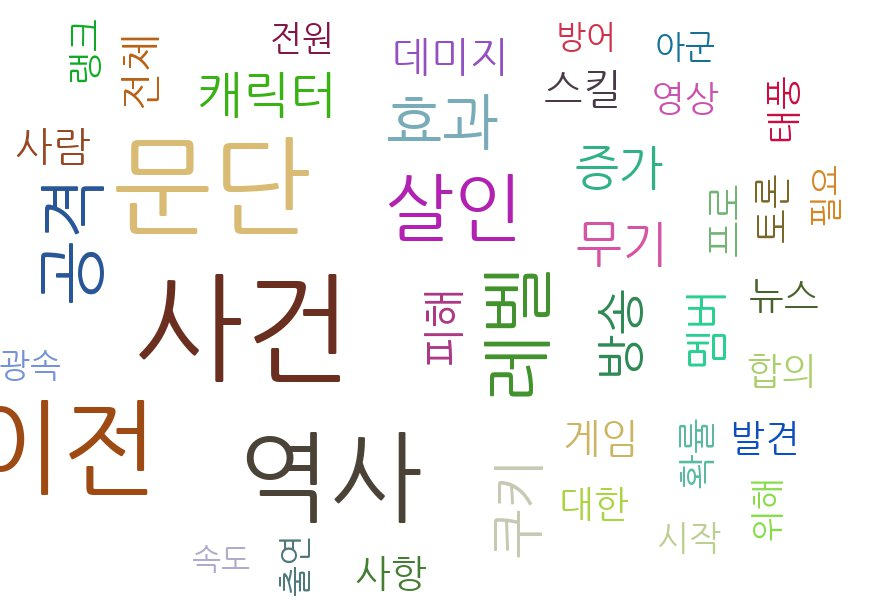

In [17]:
import random 
import pytagcloud
import webbrowser

# 가장 출현 빈도 높은 40개의 단어 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어 입력, 단어 출력 최대 크기는 80으로 제한
taglist = pytagcloud.make_tags(ranked_tags, maxsize=100)

# pytagcloud 이미지를 생성, 폰트는 나눔 고딕
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)
# 생성한 이미지를 출력
from IPython.display import Image
Image(filename='wordcloud.jpg')